In [2]:
# import dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import math
import matplotlib.gridspec as gridspec
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import plotly.graph_objs as go

In [0]:
# import dataframes
df_WHR = pd.read_excel("https://s3.amazonaws.com/happiness-report/2019/Chapter2OnlineData.xls")

#Introduction

#Goal of the project

This notebook is about happiness in the world. The aim of this project is
to identify 

*   the regions/countries with the highest hapiness score
*   the features that have an impact on the hapiness score 

and to predict the hapiness score for 2018 based on a regression model.

# I. Cleaning Data

In [4]:
df_WHR

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,2014,4.184451,7.562753,0.765839,52.380001,0.642034,-0.048634,0.820217,0.725214,0.239111,0.566209,-0.985267,-1.484067,2.079248,0.496899,NaN,0.432,0.601080,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1700,Zimbabwe,2015,3.703191,7.556052,0.735800,53.799999,0.667193,-0.097354,0.810457,0.715079,0.178861,0.590012,-0.893078,-1.357514,2.198865,0.593776,NaN,0.432,0.655137,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1701,Zimbabwe,2016,3.735400,7.538829,0.768425,54.400002,0.732971,-0.068105,0.723612,0.737636,0.208555,0.699344,-0.900649,-1.374650,2.776363,0.743257,NaN,0.432,0.596690,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1702,Zimbabwe,2017,3.638300,7.549491,0.754147,55.000000,0.752826,-0.069670,0.751208,0.806428,0.224051,0.682647,-0.988153,-1.350867,2.656848,0.730244,NaN,0.432,0.581484,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942


In [6]:
df_WHR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 26 columns):
Country name                                                1704 non-null object
Year                                                        1704 non-null int64
Life Ladder                                                 1704 non-null float64
Log GDP per capita                                          1676 non-null float64
Social support                                              1691 non-null float64
Healthy life expectancy at birth                            1676 non-null float64
Freedom to make life choices                                1675 non-null float64
Generosity                                                  1622 non-null float64
Perceptions of corruption                                   1608 non-null float64
Positive affect                                             1685 non-null float64
Negative affect                                             1691 non-null fl

In [7]:
# Droping the features according the correlation
to_drop = [
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WVS round 2010-2014',]

df_WHR.drop(to_drop, inplace=True, axis=1)
df_WHR

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,2014,4.184451,7.562753,0.765839,52.380001,0.642034,-0.048634,0.820217,0.725214,0.239111,0.566209,-0.985267,-1.484067,2.079248,0.496899
1700,Zimbabwe,2015,3.703191,7.556052,0.735800,53.799999,0.667193,-0.097354,0.810457,0.715079,0.178861,0.590012,-0.893078,-1.357514,2.198865,0.593776
1701,Zimbabwe,2016,3.735400,7.538829,0.768425,54.400002,0.732971,-0.068105,0.723612,0.737636,0.208555,0.699344,-0.900649,-1.374650,2.776363,0.743257
1702,Zimbabwe,2017,3.638300,7.549491,0.754147,55.000000,0.752826,-0.069670,0.751208,0.806428,0.224051,0.682647,-0.988153,-1.350867,2.656848,0.730244


In [8]:
# Drop null data for world hapiness score dataset
df_WHR.dropna(inplace=True)
# Check if there are null for data for world hapiness score dataset
df_WHR.isnull().sum()

Country name                                         0
Year                                                 0
Life Ladder                                          0
Log GDP per capita                                   0
Social support                                       0
Healthy life expectancy at birth                     0
Freedom to make life choices                         0
Generosity                                           0
Perceptions of corruption                            0
Positive affect                                      0
Negative affect                                      0
Confidence in national government                    0
Democratic Quality                                   0
Delivery Quality                                     0
Standard deviation of ladder by country-year         0
Standard deviation/Mean of ladder by country-year    0
dtype: int64

In [9]:
df_WHR.shape

(1317, 16)

In [0]:
#Changing the colums name
df_WHR.columns = ['Country', 'Year','Happiness score','Economy(GDP per Capita)','Social support','Health(Life expectancy at birth)','Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect','Confidence in national government','Democratic Quality','Delivery Quality','Standard deviation of ladder by country-year','Standard deviation/Mean of ladder by country-year']

In [11]:
#Check for the unique values of country names
unique = df_WHR['Country'].unique()
unique

array(['Afghanistan', 'Albania', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Comoros',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana',
       'Haiti', 'Honduras', 'Hong Kong S.A.R. of China', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kosovo', '

In [0]:
#map of region according to countries
region={
'Afghanistan' : 'Asia-Pacific',
'Albania' : 'Eastern Europe',
'Algeria' : 'Africa',
'Angola' : 'Africa',
'Argentina' : 'Latin America',
'Armenia' : 'Asia-Pacific',
'Australia' : 'Asia-Pacific',
'Austria' : 'Western Europe',
'Azerbaijan' : 'Asia-Pacific',
'Bahrain' : 'Asia-Pacific',
'Bangladesh' : 'Asia-Pacific', 
'Belarus' : 'Eastern Europe', 
'Belgium' : 'Western Europe', 
'Belize' : 'Latin America', 
'Benin' : 'Africa', 
'Bhutan' : 'Asia-Pacific',
'Bolivia' : 'Latin America', 
'Bosnia and Herzegovina' : 'Eastern Europe', 
'Botswana' : 'Africa', 
'Brazil' : 'Latin America',
'Bulgaria' : 'Eastern Europe', 
'Burkina Faso' : 'Africa', 
'Burundi' : 'Africa', 
'Cambodia' : 'Asia-Pacific', 
'Cameroon' : 'Africa',
'Canada' : 'North America', 
'Central African Republic' : 'Africa', 
'Chad': 'Africa', 
'Chile' : 'Latin America', 
'China' : 'Asia-Pacific',
'Colombia' : 'Latin America', 
'Comoros' : 'Africa', 
'Congo (Brazzaville)' : 'Africa', 
'Congo (Kinshasa)' : 'Africa',
'Costa Rica' : 'Latin America', 
'Croatia' : 'Eastern Europe', 
'Cuba' : 'Latin America', 
'Cyprus' : 'Eastern Europe', 
'Czech Republic' : 'Western Europe',
'Denmark' : 'Western Europe', 
'Djibouti' : 'Africa', 
'Dominican Republic' : 'Latin America', 
'Ecuador' : 'Latin America', 
'Egypt' : 'Africa',
'El Salvador' : 'Latin America', 
'Estonia' : 'Eastern Europe', 
'Ethiopia' : 'Africa', 
'Finland' : 'Western Europe', 
'France' : 'Western Europe', 
'Gabon' : 'Africa',
'Gambia' : 'Africa', 
'Georgia' : 'Asia-Pacific', 
'Germany' : 'Western Europe', 
'Ghana' : 'Africa', 
'Greece' : 'Eastern Europe', 
'Guatemala' : 'Latin America',
'Guinea' : 'Africa', 
'Guyana' : 'Latin America', 
'Haiti' : 'Latin America', 
'Honduras' : 'Latin America',
'Hong Kong S.A.R. of China' : 'Asia-Pacific', 
'Hungary' : 'Eastern Europe', 
'Iceland' : 'Western Europe', 
'India' : 'Asia-Pacific',
'Indonesia' : 'Asia-Pacific', 
'Iran' : 'Asia-Pacific', 
'Iraq' : 'Asia-Pacific', 
'Ireland' : 'Western Europe', 
'Israel' : 'Asia-Pacific', 
'Italy' : 'Western Europe',
'Ivory Coast' : 'Africa', 
'Jamaica' : 'Africa', 
'Japan' : 'Asia-Pacific', 
'Jordan' : 'Asia-Pacific', 
'Kazakhstan' : 'Asia-Pacific', 
'Kenya' : 'Africa',
'Kosovo' : 'Eastern Europe', 
'Kuwait' : 'Asia-Pacific', 
'Kyrgyzstan' : 'Asia-Pacific', 
'Laos' : 'Asia-Pacific', 
'Latvia' : 'Eastern Europe', 
'Lebanon' : 'Asia-Pacific',
'Lesotho' : 'Africa', 
'Liberia' : 'Africa', 
'Libya' : 'Africa', 
'Lithuania' : 'Eastern Europe', 
'Luxembourg' : 'Western Europe',
'Macedonia' : 'Eastern Europe', 
'Madagascar' : 'Africa', 
'Malawi' : 'Africa', 
'Malaysia' : 'Asia-Pacific', 
'Mali' : 'Africa', 
'Malta' : 'Western Europe',
'Mauritania' : 'Africa', 
'Mauritius' : 'Africa', 
'Mexico' : 'Latin America', 
'Moldova' : 'Eastern Europe', 
'Mongolia' : 'Asia-Pacific',
'Montenegro' : 'Eastern Europe', 
'Morocco' : 'Africa', 
'Mozambique' : 'Africa', 
'Myanmar' : 'Asia-Pacific', 
'Namibia' : 'Africa',
'Nepal' : 'Asia-Pacific', 
'Netherlands' : 'Western Europe', 
'New Zealand' : 'Asia-Pacific', 
'Nicaragua' : 'Latin America', 
'Niger' : 'Africa',
'Nigeria' : 'Africa', 
'North Cyprus' : 'Eastern Europe', 
'Norway' : 'Western Europe', 
'Oman' : 'Asia-Pacific', 
'Pakistan' : 'Asia-Pacific',
'Palestinian Territories': 'Asia-Pacific', 
'Panama' : 'Latin America', 
'Paraguay' : 'Latin America', 
'Peru' : 'Latin America',
'Philippines' : 'Asia-Pacific', 
'Poland' : 'Eastern Europe', 
'Portugal' : 'Western Europe', 
'Qatar' : 'Asia-Pacific', 
'Romania' : 'Eastern Europe',
'Russia' : 'Eastern Europe',
'Rwanda' : 'Africa', 
'Saudi Arabia' : 'Asia-Pacific', 
'Senegal' : 'Africa', 
'Serbia' : 'Eastern Europe', 
'Sierra Leone' : 'Africa',
'Singapore' : 'Asia-Pacific', 
'Slovakia' : 'Eastern Europe', 
'Slovenia' : 'Eastern Europe', 
'Somalia' : 'Africa',
'Somaliland region' : 'Africa', 
'South Africa' : 'Africa', 
'South Korea' : 'Asia-Pacific', 
'South Sudan' : 'Africa',
'Spain' : 'Western Europe', 
'Sri Lanka' : 'Asia-Pacific', 
'Sudan' : 'Africa', 
'Suriname' : 'Latin America', 
'Swaziland' : 'Africa', 
'Sweden' : 'Western Europe',
'Switzerland' : 'Western Europe', 
'Syria' : 'Asia-Pacific', 
'Taiwan Province of China' : 'Asia-Pacific', 
'Tajikistan' : 'Asia-Pacific',
'Tanzania' : 'Africa', 
'Thailand' : 'Asia-Pacific', 
'Togo' : 'Africa', 
'Trinidad and Tobago' : 'Latin America', 
'Tunisia' : 'Africa',
'Turkey' : 'Asia-Pacific', 
'Turkmenistan' : 'Asia-Pacific', 
'Uganda' : 'Africa', 
'Ukraine' : 'Eastern Europe',
'United Arab Emirates' : 'Asia-Pacific', 
'United Kingdom' : 'Western Europe', 
'United States' : 'North America',
'Uruguay' : 'Latin America', 
'Uzbekistan' : 'Asia-Pacific', 
'Venezuela' : 'Latin America', 
'Vietnam' : 'Asia-Pacific', 
'Yemen' : 'Asia-Pacific', 
'Zambia' : 'Africa',
'Zimbabwe' : 'Africa'
}

In [13]:
#Add Region column to the main dataframe
df_WHR['Region'] = df_WHR['Country'].map(region)
df_WHR

,Country,Year,Happiness score,Economy(GDP per Capita),Social support,Health(Life expectancy at birth),Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,Region
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,Asia-Pacific
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,Asia-Pacific
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,Asia-Pacific
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,Asia-Pacific
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,Asia-Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,Zimbabwe,2013,4.690188,7.565154,0.799274,50.959999,0.575884,-0.079458,0.830937,0.711885,0.182288,0.527755,-1.026085,-1.526321,1.964805,0.418918,Africa
1699,Zimbabwe,2014,4.184451,7.562753,0.765839,52.380001,0.642034,-0.048634,0.820217,0.725214,0.239111,0.566209,-0.985267,-1.484067,2.079248,0.496899,Africa
1700,Zimbabwe,2015,3.703191,7.556052,0.735800,53.799999,0.667193,-0.097354,0.810457,0.715079,0.178861,0.590012,-0.893078,-1.357514,2.198865,0.593776,Africa
1701,Zimbabwe,2016,3.735400,7.538829,0.768425,54.400002,0.732971,-0.068105,0.723612,0.737636,0.208555,0.699344,-0.900649,-1.374650,2.776363,0.743257,Africa


#2.Regions with the highest hapiness score

### Regions sorted by Happiness Score

In [0]:
df_WHR_perYear = df_WHR.groupby(['Year', 'Region'])

In [23]:
#Compute the mean happiness score for each region and rank the regions from most happy to least happy.
df_WHR_perYear.groupby('Region')['Happiness score','Economy(GDP per Capita)','Social support','Health(Life expectancy at birth)','Freedom to make life choices'].mean().sort_values(by="Happiness score", ascending=False)


AttributeError: ignored

In [0]:
df_WHR.groupby('Region')['Happiness score','Economy(GDP per Capita)','Social support','Health(Life expectancy at birth)','Freedom to make life choices'].mean().sort_values(by="Happiness score", ascending=False)



,Happiness score,Economy(GDP per Capita),Social support,Health(Life expectancy at birth),Freedom to make life choices
Region,,,,,
North America,7.269365,10.739281,0.927724,70.622857,0.885785
Western Europe,6.938104,10.651264,0.931102,71.703464,0.863749
Latin America,6.004640,9.203246,0.850237,65.091862,0.763694
Eastern Europe,5.406607,9.751776,0.851348,66.231060,0.639452
Asia-Pacific,5.259510,9.210202,0.777932,64.130700,0.731602
Africa,4.276433,7.848937,0.715576,52.584142,0.681024


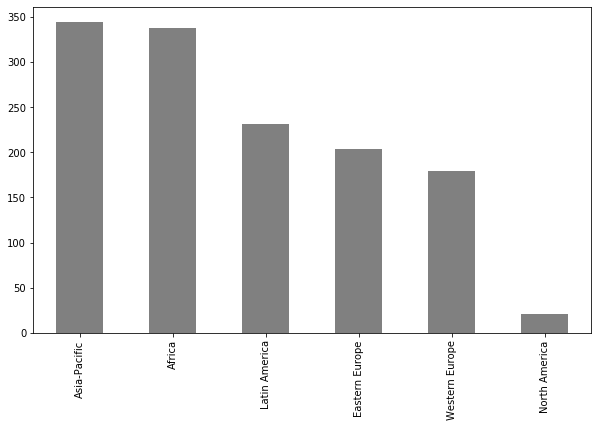

In [21]:

plt.figure(figsize=(10,6))
list = df_WHR.sort_values(by=['Happiness score'],ascending=True)['Region'].value_counts()
list.plot(kind = 'bar', color = 'grey')

In [22]:
sns.pairplot(df_WHR[['Life Ladder','Log GDP per capita', 
       'Healthy life expectancy at birth', 'Freedom to make life choices']])

KeyError: ignored

##Europe vs Asia

# 3.Features that have an impact on the hapiness score 

### Correlation of the features with Hapiness score




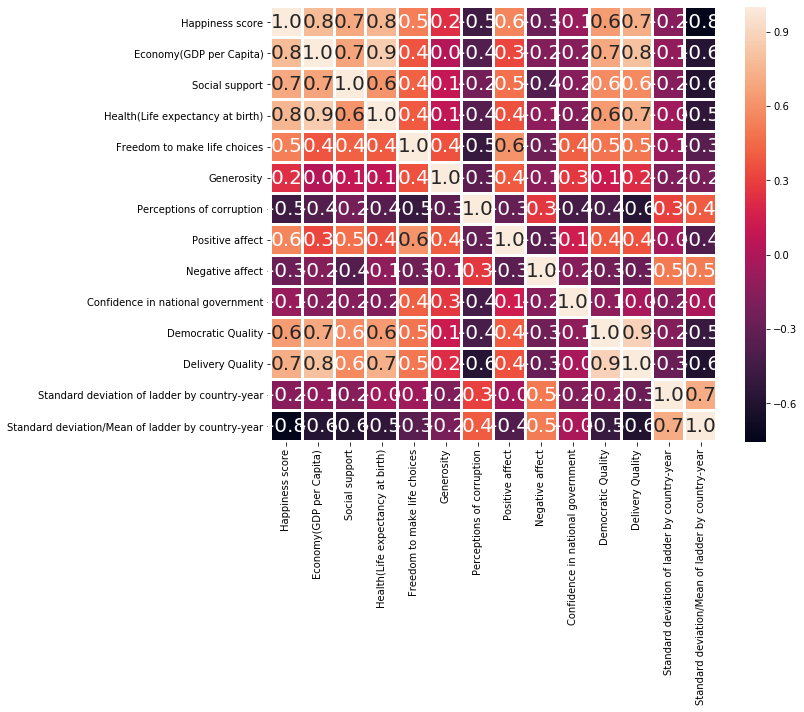

In [0]:
plt.figure(figsize=(10,8))
corr = df_WHR.drop(['Country','Region','Year'],axis = 1).corr()
sns.heatmap(corr, cbar = True, annot=True, linewidths = 2, fmt='.1f',annot_kws={'size': 20}) 


We can see that the Hapiness score is highly correlated with economy, social support and delivery quality.

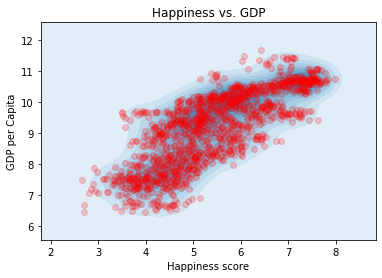

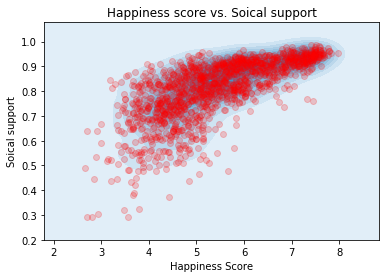

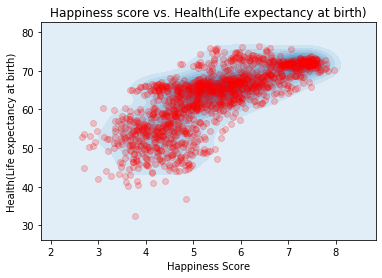

In [0]:
sns.kdeplot(df_WHR['Happiness score'], df_WHR['Economy(GDP per Capita)'], shade=True)
plt.scatter(df_WHR['Happiness score'], df_WHR['Economy(GDP per Capita)'], alpha=0.2, color='red')
plt.xlabel('Happiness score')
plt.ylabel('GDP per Capita')
plt.title('Happiness vs. GDP')
plt.show()


sns.kdeplot(df_WHR['Happiness score'], df_WHR['Social support'], shade=True)
plt.scatter(df_WHR['Happiness score'], df_WHR['Social support'], alpha=0.2, color='red')
plt.xlabel('Happiness Score')
plt.ylabel('Soical support')
plt.title('Happiness score vs. Soical support')
plt.show()


sns.kdeplot(df_WHR['Happiness score'], df_WHR['Health(Life expectancy at birth)'], shade=True)
plt.scatter(df_WHR['Happiness score'], df_WHR['Health(Life expectancy at birth)'], alpha=0.2, color='red')
plt.xlabel('Happiness Score')
plt.ylabel('Health(Life expectancy at birth)')
plt.title('Happiness score vs. Health(Life expectancy at birth)')
plt.show()

<Figure size 864x864 with 0 Axes>

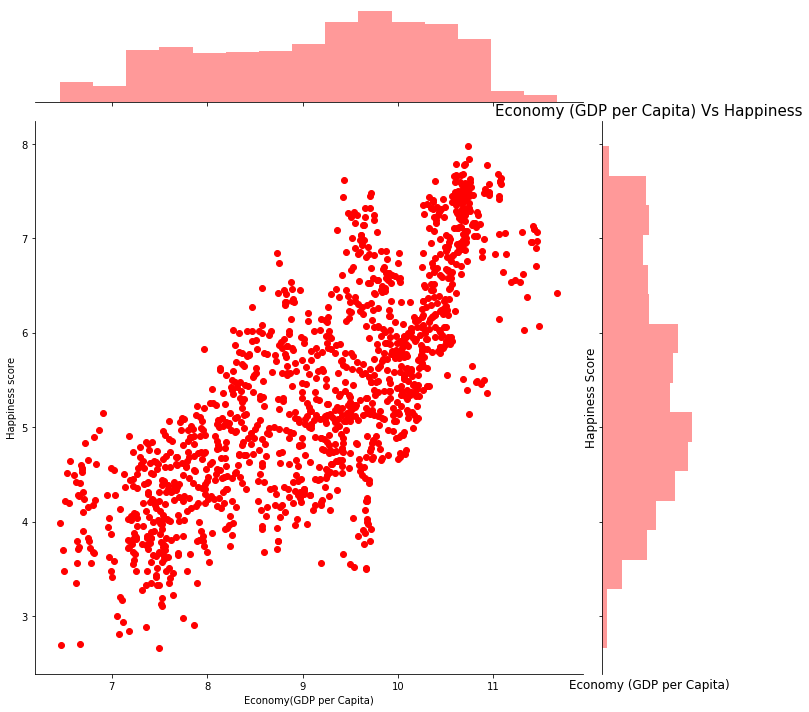

In [0]:
#Jointplot for Happiness score and GDP 

plt.figure(figsize=(12,12))
sns.jointplot(x = 'Economy(GDP per Capita)', y = 'Happiness score', data = df_WHR, height=10, color='red')
plt.ylabel('Happiness Score', fontsize=12)
plt.xlabel('Economy (GDP per Capita)', fontsize=12)
plt.title('Economy (GDP per Capita) Vs Happiness', fontsize=15)
plt.show()

We can see when GDP increase, the happiness score increase.

<Figure size 864x864 with 0 Axes>

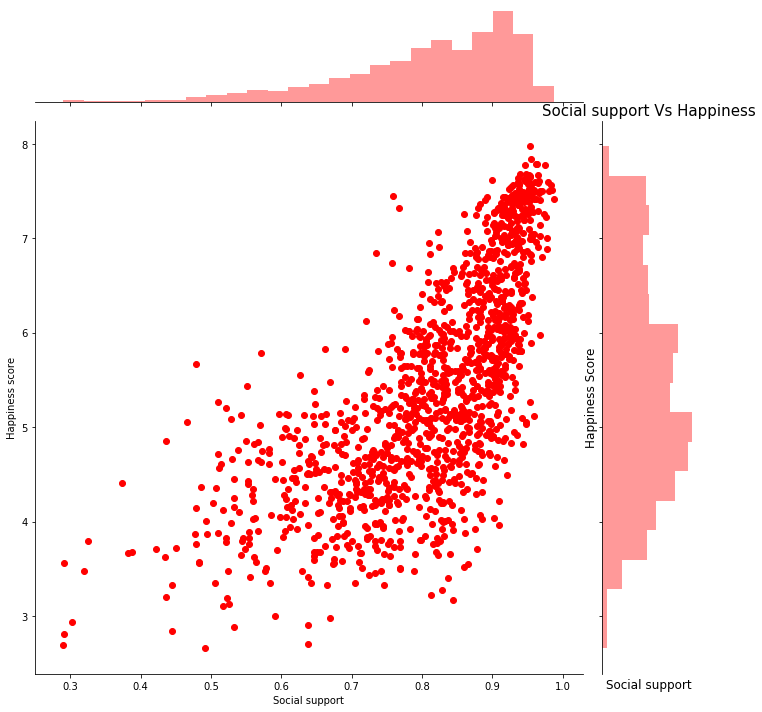

In [0]:
#Jointplot for Happiness score and Social support

plt.figure(figsize=(12,12))
sns.jointplot(x = 'Social support', y = 'Happiness score', data = df_WHR, height=10, color='red')
plt.ylabel('Happiness Score', fontsize=12)
plt.xlabel('Social support', fontsize=12)
plt.title('Social support Vs Happiness', fontsize=15)
plt.show()

We can see when social score increase, the happiness score increase.

<Figure size 864x864 with 0 Axes>

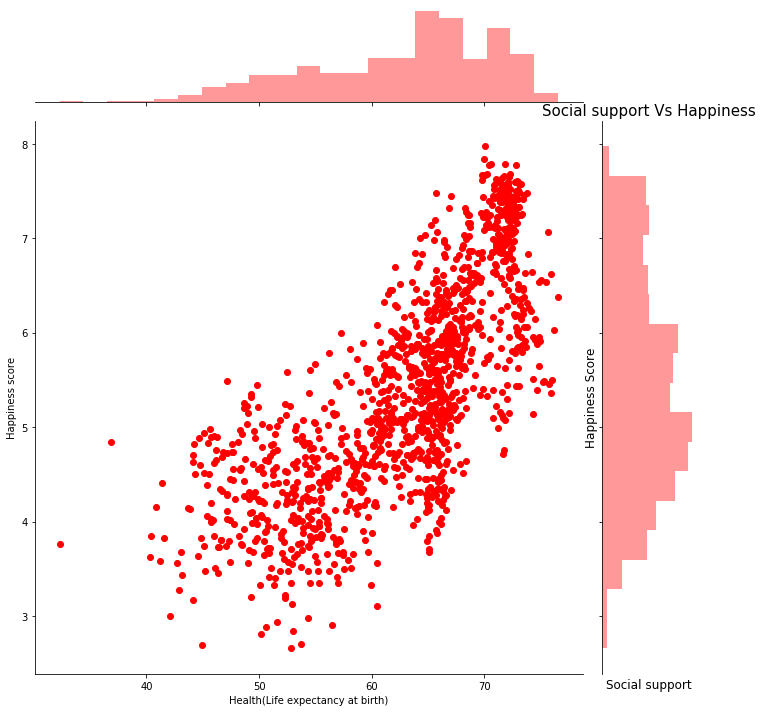

In [20]:
#Jointplot for Happiness score and Social support

plt.figure(figsize=(12,12))
sns.jointplot(x = 'Health(Life expectancy at birth)', y = 'Happiness score', data = df_WHR, height=10, color='red')
plt.ylabel('Happiness Score', fontsize=12)
plt.xlabel('Social support', fontsize=12)
plt.title('Social support Vs Happiness', fontsize=15)
plt.show()

##Linear regression

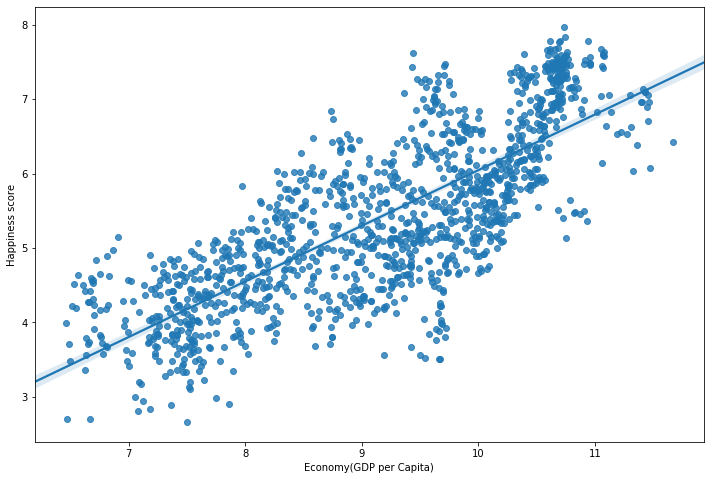

In [0]:
plt.figure(figsize=(12,8))
sns.regplot(x='Economy(GDP per Capita)',y='Happiness score' ,data=df_WHR)

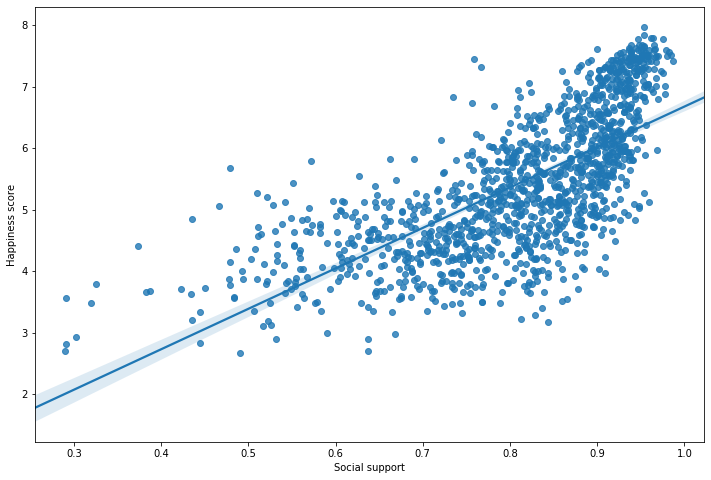

In [0]:
plt.figure(figsize=(12,8))
sns.regplot(x='Social support',y='Happiness score' ,data=df_WHR)

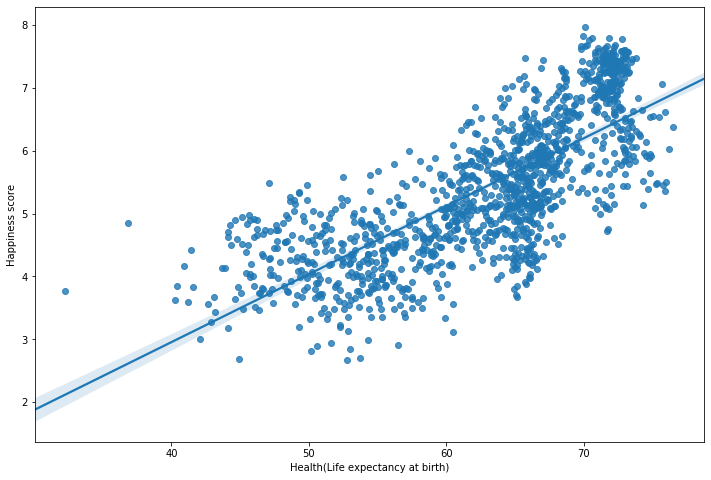

In [0]:
plt.figure(figsize=(12,8))
sns.regplot(x='Health(Life expectancy at birth)',y='Happiness score' ,data=df_WHR)

There is a **linear regression** with:


*   Happiness score and GPD
*   Happiness score and Social support
*   Happiness score and Health



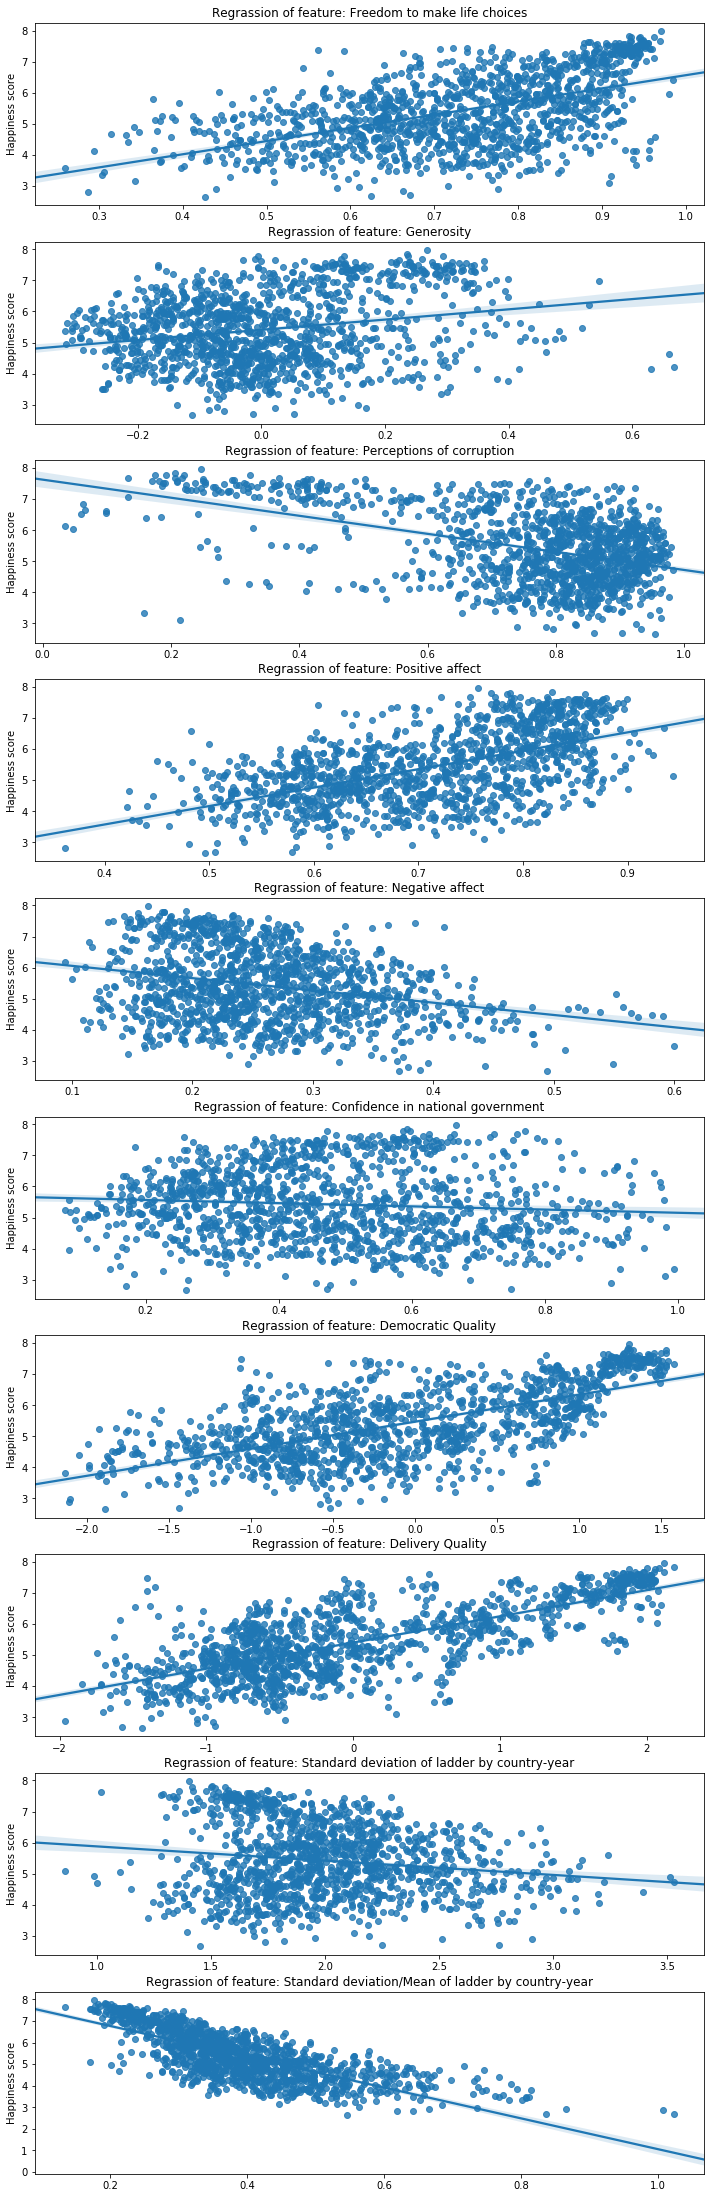

In [0]:
cols = ['Freedom to make life choices', 'Generosity','Perceptions of corruption','Positive affect',
        'Negative affect','Confidence in national government','Democratic Quality','Delivery Quality','Standard deviation of ladder by country-year',
        'Standard deviation/Mean of ladder by country-year']
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(cols):
    ax = plt.subplot(gs[i])
    #sns.distplot(df1[cn], bins=50)
    sns.regplot(x=df_WHR[cn],y='Happiness score' ,data=df_WHR)
    ax.set_xlabel('')
    ax.set_title('Regrassion of feature: ' + str(cn))
plt.show()